In [3]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# read data

In [8]:
#path = "/Users/Yidi/Desktop/YeastTrackAnalysis-master/"
path = "/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/"
#folder = 'dataToAnalyze/'
folder = 'sample_data/'

################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

# change your filename to the file you want to analyze
file = '69.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

# if your file is a CSV: put FALSE
# if your file is a EXCEL: put TRUE
isExcel = False

excludeTheFirstNFrames = 5
################


outputpath = path+folder

In [39]:
if (isExcel):
    data = pd.read_excel(path+folder+file)
else:
    data = pd.read_csv(path+folder+file)
dataIndex = np.invert(np.isnan(data['x']))
data = data[dataIndex]
data = data[excludeTheFirstNFrames:]
data[0:5]

,,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore,Unnamed: 11,Trajectory
5,6,5,122.71906,225.75143,0,2.45433,2.11095,5.67990,17.77003,62.26250,0.00765,NaN,69
6,7,6,122.62809,225.54369,0,2.32981,2.08108,5.51964,17.01074,58.70204,0.00761,NaN,69
7,8,7,123.19090,226.74895,0,2.72129,2.62963,8.35099,29.54094,112.48254,0.00735,NaN,69
8,9,8,122.73274,225.87331,0,2.04448,2.19163,6.12867,19.89705,72.00130,0.00710,NaN,69
9,10,9,123.23058,226.04214,0,2.47644,2.31366,6.76448,22.67121,83.57159,0.01403,NaN,69


# Trajectory in x,y

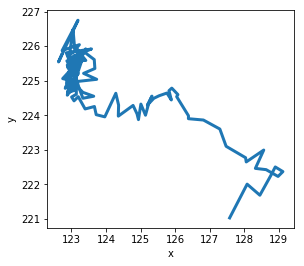

In [41]:

x = data['x'].values
y = data['y'].values
plt.plot(x,y,lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(outputpath+file+'_traj_xy.png')

# distance from start

In [42]:
time = frameToSecondConversion*data['Frame']
distancesFromStart = []
for i in range(1,len(data)):
    v0 = np.array([x[0],y[0]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    distancesFromStart.append(dist)
distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)



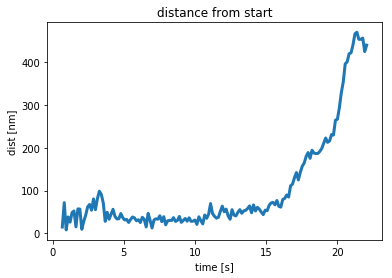

In [43]:
plt.plot(time[0:-1],distancesFromStart,lw=3)
plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_distToStart.png')

# intensity

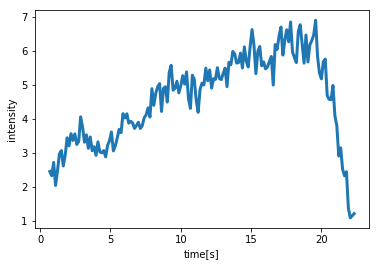

In [44]:

intensity = data['m0']
plt.plot(time,intensity,lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')
plt.savefig(file+'_intensity.png')

# speed

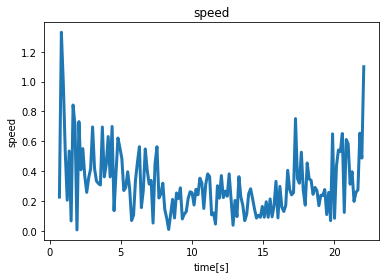

In [45]:

frameByFrameDistances = []
for i in range(1,len(data)):
    v0 = np.array([x[i-1],y[i-1]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    frameByFrameDistances.append(dist)
frameByFrameDistances = np.array(frameByFrameDistances)


plt.plot(time[0:-1],frameByFrameDistances,lw=3)
plt.title('speed')
plt.xlabel('time[s]')
plt.ylabel('speed')
plt.savefig(outputpath+file+'_speed.png')

# find inflection point

inflectionPointIndex: 103
inflectionPoint Frame: 103
inflectionPoint Intensity: 5.65819


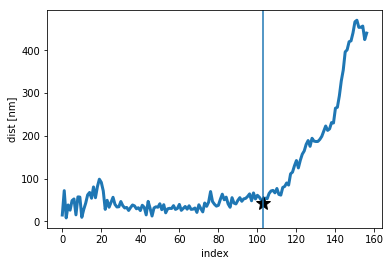

In [46]:


x=np.arange(0,len(distancesFromStart))
y=distancesFromStart

inflectionPointIndex = ytf.findInflectionPoint(x,y)
print("inflectionPointIndex: {}".format(inflectionPointIndex))
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))


#plt.plot(x, newy, 'o', label='original data',color='b')
plt.plot(distancesFromStart,lw=3)
plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
plt.axvline(x[inflectionPointIndex])

plt.xlabel('index')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_inflectionPoint.png')

# plot distance and intensity at the same time

inflectionPoint Frame: 103
inflectionPoint Time[s]: 14.111
inflectionPoint Intensity: 5.65819


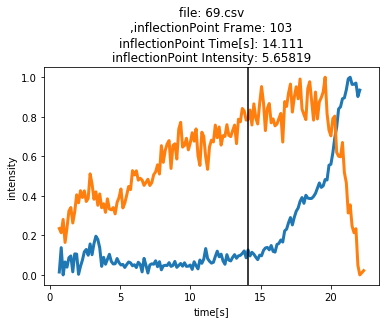

In [53]:
plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.axvline(time[0:-1][inflectionPointIndex],c='k')
inflectionPointFrame = data['Frame'][inflectionPointIndex]
inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
inflexctionPointIntensity = data['m0'][inflectionPointIndex]

print("inflectionPoint Frame: {}".format(inflectionPointFrame))
print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
print("inflectionPoint Intensity: {}".format(inflexctionPointIntensity))

plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))

plt.savefig(outputpath+file+'_intensity+distance.png')

inflectionPoint Frame: 103
inflectionPoint Time[s]: 14.111
inflectionPoint Intensity: 5.65819


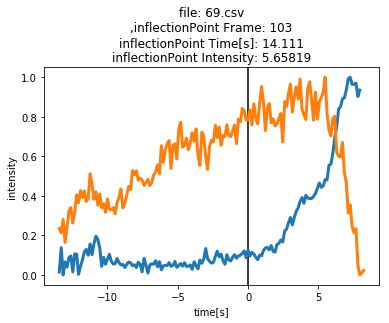

In [57]:


inflectionPointFrame = data['Frame'][inflectionPointIndex]
inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
inflexctionPointIntensity = data['m0'][inflectionPointIndex]

print("inflectionPoint Frame: {}".format(inflectionPointFrame))
print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
print("inflectionPoint Intensity: {}".format(inflexctionPointIntensity))

plt.axvline(time[0:-1][inflectionPointIndex]-inflectionPointTime,c='k')
plt.plot(time[0:-1]-inflectionPointTime,(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))

plt.savefig(outputpath+file+'_intensity+distance.png')




In [73]:
# export as new excel files

data['time[s]']=time
data['time aligned [s]']=time-inflectionPointTime
distanceForExport = np.concatenate((np.array([0]),distancesFromStart))
data['distance']=distanceForExport
normDistanceForExport = np.concatenate((np.array([0]),(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart))))
data['distance normalized']= normDistanceForExport
data.to_csv(outputpath+file+'_processed.csv')
data

,,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore,Unnamed: 11,Trajectory,time[s],distance,distance normalized,time aligned [s]
5,6,5,122.71906,225.75143,0,2.45433,2.11095,5.67990,17.77003,62.26250,0.00765,NaN,69,0.685,0.000000,0.000000,-13.426
6,7,6,122.62809,225.54369,0,2.32981,2.08108,5.51964,17.01074,58.70204,0.00761,NaN,69,0.822,14.741027,0.014646,-13.289
7,8,7,123.19090,226.74895,0,2.72129,2.62963,8.35099,29.54094,112.48254,0.00735,NaN,69,0.959,71.726525,0.137941,-13.152
8,9,8,122.73274,225.87331,0,2.04448,2.19163,6.12867,19.89705,72.00130,0.00710,NaN,69,1.096,7.971946,0.000000,-13.015
9,10,9,123.23058,226.04214,0,2.47644,2.31366,6.76448,22.67121,83.57159,0.01403,NaN,69,1.233,38.243263,0.065496,-12.878
10,11,10,123.09798,225.88470,0,2.96995,2.28858,6.71204,22.77428,85.46638,0.00759,NaN,69,1.370,26.108750,0.039241,-12.741
11,12,11,123.05250,226.41797,0,3.07087,2.35248,6.92955,23.29530,85.87325,0.00735,NaN,69,1.507,48.443877,0.087566,-12.604
12,13,12,123.05061,226.48514,0,2.61650,2.43900,7.37204,25.30025,94.90689,0.00831,NaN,69,1.644,52.334316,0.095983,-12.467
13,14,13,122.92909,225.65080,0,2.94202,2.07377,5.56166,17.58624,62.96048,0.00962,NaN,69,1.781,15.138024,0.015505,-12.330
14,15,14,123.58216,225.91922,0,3.44626,2.28860,6.55213,21.42228,77.08907,0.00759,NaN,69,1.918,57.151787,0.106407,-12.193


# statistics

In [49]:
print("max intensity: {}".format(np.max(data['m0'])))
print("first frame: {}".format(data['Frame'].values[0]))
print("last frame: {}".format(np.array(data['Frame'])[-1]))

lenthOfTrackInFrames = np.array(data['Frame'])[-1]-np.array(data['Frame'].values[0])
print("lenght of track [frames]: {}".format(lenthOfTrackInFrames))

print("lenght of track [s]: {}".format(frameToSecondConversion*lenthOfTrackInFrames))

max intensity: 6.903410000000001
first frame: 5
last frame: 163
lenght of track [frames]: 158
lenght of track [s]: 21.646
